In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
df=pd.read_csv('C:/Users/prade/Desktop/imarticus files/DATASETS/MACHINE LEARNING/gld_price_data.csv')

In [5]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
df.shape

(2290, 6)

In [6]:
## handling missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
## statistical measures of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<AxesSubplot:>

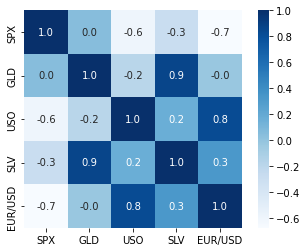

In [18]:
sns.heatmap(df.corr(),annot=True,cmap='Blues',cbar=True,square=True,fmt='.1f')

In [25]:
print(df.corr()['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

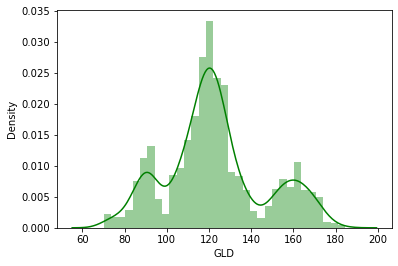

In [31]:
sns.distplot(df['GLD'],color='green')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [178]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [179]:
x=df.drop(['Date','GLD'],axis=1)

In [180]:
y=df['GLD']

In [181]:
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [182]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

## Linear regression

In [183]:
lr=LinearRegression()

In [184]:
lr.fit(x_train,y_train)

LinearRegression()

In [185]:
tr_pred=lg.predict(x_train)
ts_pred=lg.predict(x_test)

In [186]:
print('training R2_score',r2_score(np.exp(y_train),np.exp(tr_pred)))

training R2_score -204973887771.3521


In [187]:
print('training RMSE score',np.sqrt(mean_squared_error(np.exp(y_train),np.exp(tr_pred))))

training RMSE score 1.5801739295828663e+84


In [188]:
print('testing R2_score',r2_score(np.exp(y_test),ts_pred))

testing R2_score -0.002473995965486475


In [189]:
print('testing RMSE score',np.sqrt(mean_squared_error(np.exp(y_test),ts_pred)))

testing RMSE score 7.121357515815444e+75


## RandomForest Regressor

In [190]:
model = RandomForestRegressor(n_estimators=100)

In [191]:
model.fit (x_train, y_train)

RandomForestRegressor()

In [195]:
y_preds = model.predict(x_test)

In [198]:
print(y_preds)

[168.63609955  82.08189992 116.00480034 127.53660069 120.48330172
 154.78809764 150.49579849 125.94320002 117.23679877 126.03740048
 116.68560099 171.84860075 141.68989875 167.8891996  115.10340008
 117.72710021 138.73060259 170.23600131 159.62390225 159.66729895
 155.16760017 125.35640012 175.58880001 157.11130359 125.25000024
  93.75689985  77.46510031 120.81049996 119.13119943 167.41519953
  88.12880053 125.2359      91.27140103 117.64020045 121.16879907
 136.43250098 115.52890139 115.37910071 147.44189926 107.1491007
 103.92130243  87.25859791 126.49900047 117.95290036 155.19049852
 119.62909999 108.41409981 107.94979827  93.20040064 127.04989798
  75.19370007 113.62279914 121.6037     111.23629939 118.84689891
 120.95299911 159.84080115 168.82830099 146.82119673  85.7591987
  94.34710044  86.82879919  90.54660015 119.11990037 126.45860049
 127.58580018 169.60329971 122.26439964 117.44819914  98.31270069
 168.15800158 142.93349832 132.20290218 121.22050239 121.52869911
 119.9291005

In [199]:
MSE = metrics.mean_squared_error(y_test, y_preds)
MAE = metrics.mean_absolute_error(y_test, y_preds)
r_2 = metrics.r2_score(y_test, y_preds)
print (f'Mean Squared Error = {MSE}')
print (f'Mean Absolute Error = {MAE}')
print (f'R-Squared error = {r_2}')

Mean Squared Error = 5.671753252500089
Mean Absolute Error = 1.3291923574235747
R-Squared error = 0.9892467093717683


In [197]:
accuracy_train = model.score(x_train, y_train)
accuracy_test = model.score(x_test, y_test)
print(accuracy_train)
print(accuracy_test)

0.998444862978584
0.9892467093717683
